In [2]:
import pandas as pd
import numpy as np
import requests
import re
import urllib.parse
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
import json
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager

In [ ]:
#Minimum Wage data
#csv to dataframe
minwagedf = pd.read_csv('minimum-wage-2024-by-state3.csv')
minwagedf = minwagedf.sort_values(by='state').reset_index(drop=True)


In [28]:
#median/ average income
states=[]
averages= []
medians= []

url = "https://www.sofi.com/learn/content/average-salary-in-us/"
r = requests.get(url)
text = r.text
soup= BeautifulSoup(r.text)
trs = soup.find_all('tr')

for row in trs:  
    cols = row.find_all("td")  # Get all columns in the row
    if len(cols) >= 3:  # Ensure it has enough columns
        states.append(cols[0].text.strip())
        averages.append(int(cols[1].text.replace("$", "").replace(",", "")))
        medians.append(int(cols[2].text.replace("$", "").replace(",", "")))
medavgdf = pd.DataFrame({'State':states, 'Average':averages, 'Median':medians})
medavgdf= medavgdf.rename(columns={"State": "state"})


In [93]:
#cost of living
fulllivingcostdf = pd.read_json("cost-of-living-index-by-state-2025.json")  # Read JSON file directly
fulllivingcostdf = fulllivingcostdf.drop(columns=['stateFlagCode'])
fulllivingcostdf = fulllivingcostdf.rename(columns={
    "CostOfLivingIndex_CostOfLivingIndex_num_2024": "CostOfLiving",
    "CostOfLivingIndex_GroceriesCostsIndex_num_2024": "GroceriesCosts",
    "CostOfLivingIndex_HousingCostsIndex_num_2024": "HousingCosts",
    "CostOfLivingIndex_TransportationCostsIndex_num_2024": "TransportationCosts",
    "CostOfLivingIndex_UtilitiesCostsIndex_num_2024": "UtilitiesCosts",
    "CostOfLivingIndex_HealthCostsIndex_num_2024": "HealthCareCosts",
    "CostOfLivingIndex_MiscCostsIndex_num_2024": "MiscellaneousGoodsServicesCosts"
})
fulllivingcostdf= fulllivingcostdf.sort_values(by='state').reset_index(drop=True)
livingcostdf = fulllivingcostdf[['state', 'CostOfLiving']]

In [112]:
#gdp amount per state
gdpdf = pd.read_csv('gdp-by-state-2025.csv')
gdpdf = gdpdf.sort_values(by='state').reset_index(drop=True)

gdpdf = gdpdf.rename(columns={"StateGDPPerCapita2022": "GDP"})
gdpdf = gdpdf[['state', 'GDP']]

In [111]:
#gdp growth rate per state
gdpgrowthdf = pd.read_csv('gdp-growth-by-state-2025.csv')
gdpgrowthdf = gdpgrowthdf.sort_values(by='state').reset_index(drop=True)
gdpgrowthdf = gdpgrowthdf.rename(columns={"GDPGrowth2021To22": "GDPGrowth"})
gdpgrowthdf = gdpgrowthdf[['state', 'GDPGrowth']]

In [110]:
#unemployment rate per state
unemploymentdf = pd.read_csv('unemployment-rate-by-state-2025.csv')
unemploymentdf = unemploymentdf.sort_values(by='state').reset_index(drop=True)
unemploymentdf.rename(columns={"UnemploymentRateJuly2023": "UnemploymentRate"}, inplace=True)
unemploymentdf = unemploymentdf[['state', 'UnemploymentRate']]

In [145]:
#fast food prices
fastfooddf = pd.read_json("fast-food-prices-by-state-2025.json")
fastfooddf = fastfooddf.drop(columns=['stateFlagCode'])
fastfooddf = fastfooddf.rename(columns={
    "FastFoodPricesDominosMedCheese": "DominosMedCheese",
    "FastFoodPricesMcDonaldsHappyMeal": "McDonaldsHappyMeal",
    "FastFoodPricesMcDonaldsBigMac": "McDonaldsBigMac",
    "FastFoodPricesChickfilAChickenSandwich": "ChickfilAChickenSandwich",
    "FastFoodPricesTacoBellComboMeal": "TacoBellComboMeal"
})
fastfooddf= fastfooddf.sort_values(by='state').reset_index(drop=True)

In [148]:
#combine all df into one on state
combined_df = medavgdf.merge(livingcostdf, on='state', how='outer') \
                      .merge(minwagedf, on='state', how='outer') \
                      .merge(gdpdf, on='state', how='outer') \
                      .merge(gdpgrowthdf, on='state', how='outer') \
                      .merge(unemploymentdf, on='state', how='outer') \
                      .merge(fastfooddf, on='state', how='outer')

combined_df = combined_df[combined_df['state'] != "District of Columbia"].rename(columns={"Average": "AverageIncome", "Median": "MedianIncome"})
combined_df = combined_df.sort_values(by='state').reset_index(drop=True)
combined_df.to_csv('fast_food_analysis.csv', index=False)
combined_df

,state,AverageIncome,MedianIncome,CostOfLiving,MinimumWage,GDP,GDPGrowth,UnemploymentRate,DominosMedCheese,McDonaldsHappyMeal,McDonaldsBigMac,ChickfilAChickenSandwich,TacoBellComboMeal
0,Alabama,53394.0,59605.0,88.0,NaN,50637,1.6,2.1,12.99,2.79,3.99,3.05,5.79
1,Alaska,66130.0,82512.0,123.8,11.73,68919,-2.4,3.8,15.99,3.40,4.87,3.72,7.06
2,Arizona,63045.0,66340.0,111.5,14.35,56667,2.5,3.6,14.99,3.10,4.43,3.39,6.43
3,Arkansas,51251.0,54658.0,88.7,11.00,51787,2.6,2.6,12.99,2.76,3.95,3.02,5.73
4,California,76960.0,74819.0,144.8,16.00,77339,0.4,4.6,14.99,3.57,5.11,3.90,7.41
5,Colorado,71968.0,77331.0,102.0,14.42,74167,3.2,2.9,14.99,3.21,4.59,3.51,6.66
6,Connecticut,73736.0,81285.0,112.3,15.69,84972,2.4,3.6,14.49,3.46,4.95,3.78,7.18
7,Delaware,65998.0,75674.0,100.8,13.25,61387,2.1,4.1,13.99,3.24,4.63,3.54,6.72
8,Florida,60216.0,62973.0,102.8,12.00,63597,4.0,2.7,13.99,3.12,4.47,3.42,6.48
9,Georgia,61256.0,62468.0,91.3,5.15,57129,2.8,3.2,13.99,2.90,4.15,3.17,6.02


                          AverageIncome  MedianIncome  CostOfLiving  \
AverageIncome                  1.000000      0.834178      0.640297   
MedianIncome                   0.834178      1.000000      0.646540   
CostOfLiving                   0.640297      0.646540      1.000000   
MinimumWage                    0.693100      0.513697      0.561329   
GDP                            0.875779      0.779054      0.519798   
GDPGrowth                      0.168859      0.087244      0.037012   
UnemploymentRate               0.206623     -0.013399      0.072368   
DominosMedCheese               0.469969      0.494077      0.677295   
McDonaldsHappyMeal             0.757684      0.725050      0.717649   
McDonaldsBigMac                0.817819      0.769839      0.781653   
ChickfilAChickenSandwich       0.860466      0.805910      0.816844   
TacoBellComboMeal              0.852884      0.801160      0.809005   

                          MinimumWage       GDP  GDPGrowth  UnemploymentRate

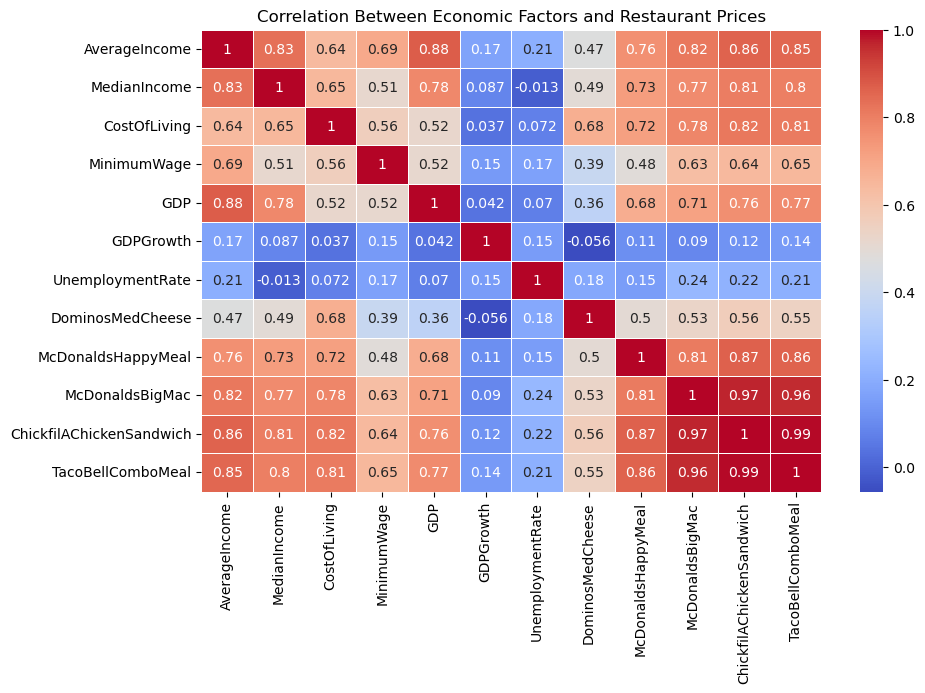

In [143]:
#AverageIncome coorelation to fast food df
# Compute correlation matrix
matrix = combined_df.set_index("state").corr()

# Display correlation values
print(matrix)


# Visualize with a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Economic Factors and Restaurant Prices")
plt.show()